In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from GeneticFeatures.GeneticFeatureGenerator import *
from GeneticFeatures.Node import *

from tester import *

In [25]:
def add(x, y):
    return x + y

def sub(x, y):
    return x - y

def mul(x, y):
    return x * y

def div(x, y):
    return x / (y + 1e-10)

def hyp(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.hypot(x, y)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.hypot(x, y)

def log(x, y):
    if isinstance(x, float) and isinstance(y, float):
        return np.log(np.hypot(x, y) + 1e-10)
    if isinstance(x, float):
        x = np.ones_like(y) * x
    if isinstance(y, float):
        y = np.ones_like(x) * y
    return np.log(np.hypot(x, y) + 1e-10)

In [26]:
generator = GeneticFeatureGenerator(
    [add, sub, mul, div, hyp, log],
    operation_names = ["+", "-", "*", "/", "hyp", "log"],
    popsize = 120, 
    maxiter = 250, 
    mutation_rate = 0.05,
    max_tree_depth = 10,
)

In [27]:
dataset = load_diabetes()
X = dataset.data
y = dataset.target
X.shape, y.shape

((442, 10), (442,))

In [28]:
tester = tester(X, y, generator, 10, 1, X.shape[0], verbose = True, test_size = 0.2, random_state = 13)

Split:  0 Feature:  0
Iteration:  249 Best fitness:  0.39659572419106315 Generation best 0.35677484591679516
Split:  0 Feature:  1
Iteration:  249 Best fitness:  0.38609880585516176 Generation best 0.37122014637904466
Split:  0 Feature:  2
Iteration:  249 Best fitness:  0.3565100154083205 Generation best 0.26263963790446844
Split:  0 Feature:  3
Iteration:  249 Best fitness:  0.40764637904468415 Generation best 0.37280912942989223
Split:  0 Feature:  4
Iteration:  249 Best fitness:  0.28710034668721107 Generation best 0.26263963790446844
Split:  0 Feature:  5
Iteration:  249 Best fitness:  0.3640215716486903 Generation best 0.33763482280431434
Split:  0 Feature:  6
Iteration:  249 Best fitness:  0.3816929892141756 Generation best 0.37001637134052397
Split:  0 Feature:  7
Iteration:  249 Best fitness:  0.3810911016949152 Generation best 0.365490177195685667
Split:  0 Feature:  8
Iteration:  249 Best fitness:  0.3706423343605547 Generation best 0.358363828967642565
Split:  0 Feature:  9


In [29]:
for tree in tester.trees:
    tree.root.update_depth(1)
    print(tree.root.get_max_depth())

9
9
9
10
4
8
9
10
10
10


In [30]:
tester.test_models(notests=50, show_iterations=10)

Iteration 9 - MSE 3150.4367528884527, R2 0.35758337594820844, MAE 43.2676483986567, NEW_MSE 3028.083287522412, NEW_R2 0.38253290083215485, NEW_MAE 42.094791359212806
Iteration 19 - MSE 3150.4367528884527, R2 0.35758337594820844, MAE 43.2676483986567, NEW_MSE 3028.083287522412, NEW_R2 0.38253290083215485, NEW_MAE 42.094791359212806
Iteration 29 - MSE 3150.4367528884527, R2 0.35758337594820844, MAE 43.2676483986567, NEW_MSE 3028.083287522412, NEW_R2 0.38253290083215485, NEW_MAE 42.094791359212806
Iteration 39 - MSE 3150.4367528884527, R2 0.35758337594820844, MAE 43.2676483986567, NEW_MSE 3028.083287522412, NEW_R2 0.38253290083215485, NEW_MAE 42.094791359212806
Iteration 49 - MSE 3150.4367528884527, R2 0.35758337594820844, MAE 43.2676483986567, NEW_MSE 3028.083287522412, NEW_R2 0.38253290083215485, NEW_MAE 42.094791359212806
Iteration 9 - MSE 3138.7909690841466, R2 0.3599581086290471, MAE 45.449287377750956, NEW_MSE 3255.5710049410504, NEW_R2 0.33614508133273446, NEW_MAE 46.51851309690925

In [31]:
tester.get_tests()

,Model,MSE,R2,MAE,NEW_MSE,NEW_R2,NEW_MAE
0,RandomForestRegressor,3150.436753,0.357583,43.267648,3028.083288,0.382533,42.094791
1,SGDRegressor,3154.027292,0.356851,45.546403,3149.708957,0.357732,45.573005
2,GradientBoostingRegressor,5438.537935,-0.108991,54.027652,3691.612052,0.247230,45.644354


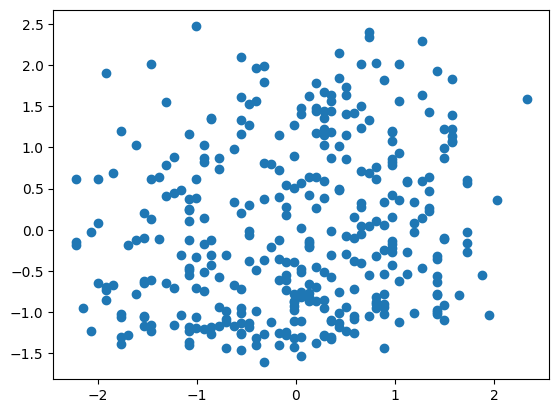

Min:  -2.2211338472651443 Max:  2.3302994813993063 Mean:  6.164411128230331e-17 Std:  1.0


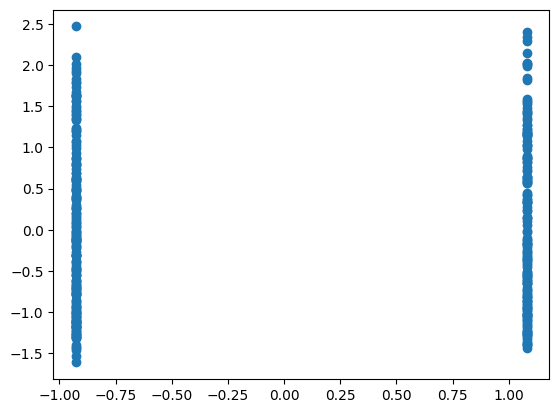

Min:  -0.9262260722102926 Max:  1.0796500228218142 Mean:  3.321233750720015e-16 Std:  1.0000000000000009


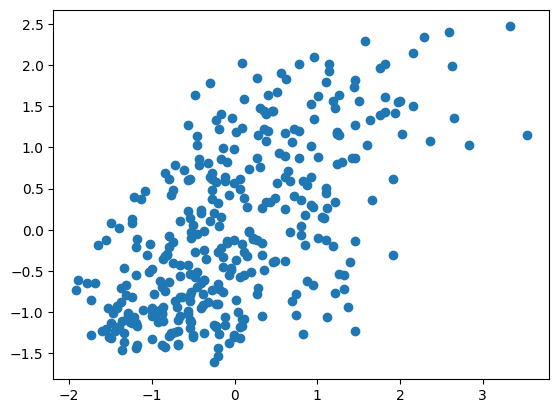

Min:  -1.9174932041558805 Max:  3.5326406989624117 Mean:  -1.0064344699151561e-17 Std:  0.9999999999999998


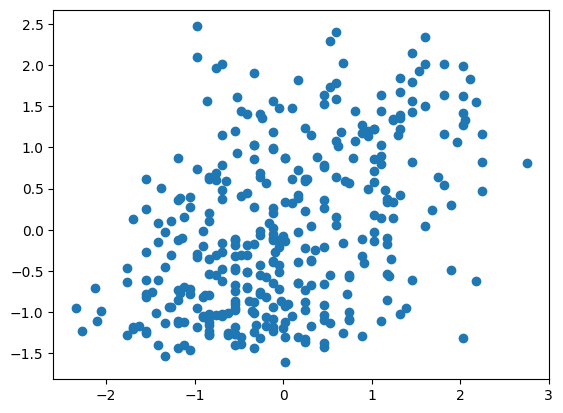

Min:  -2.3393062200092465 Max:  2.751586686529699 Mean:  2.5160861747878902e-17 Std:  0.9999999999999997


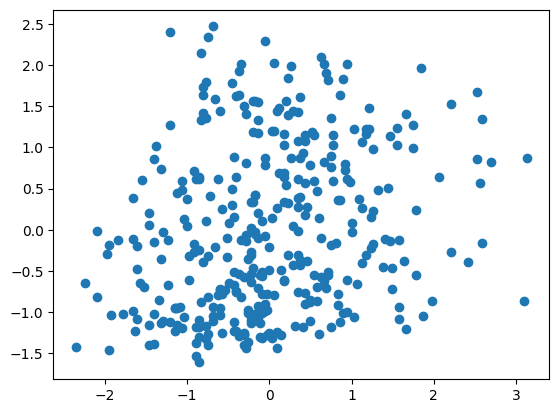

Min:  -2.3514585704910695 Max:  3.1315914450102063 Mean:  -3.0193034097454685e-17 Std:  1.0


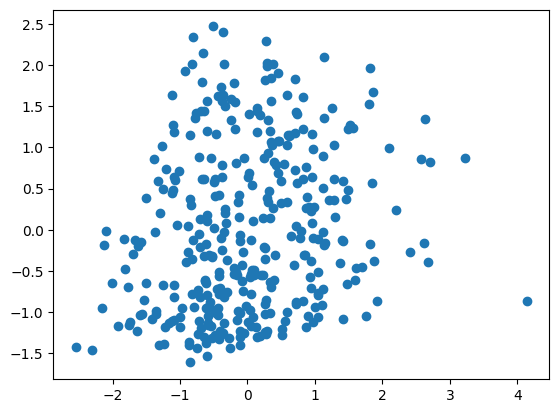

Min:  -2.5432155122389166 Max:  4.140824191904701 Mean:  2.767694792266679e-17 Std:  0.9999999999999993


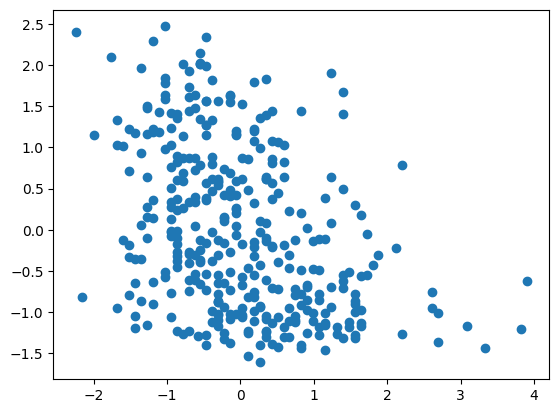

Min:  -2.24147428928296 Max:  3.9018849826058126 Mean:  -5.0321723495757804e-17 Std:  1.0000000000000007


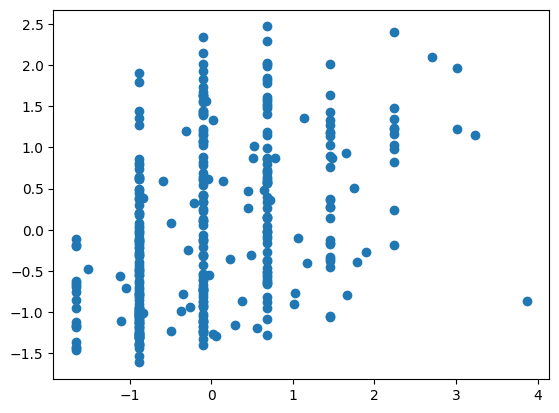

Min:  -1.6580007483373784 Max:  3.8669097565640835 Mean:  1.993998293519403e-16 Std:  1.000000000000001


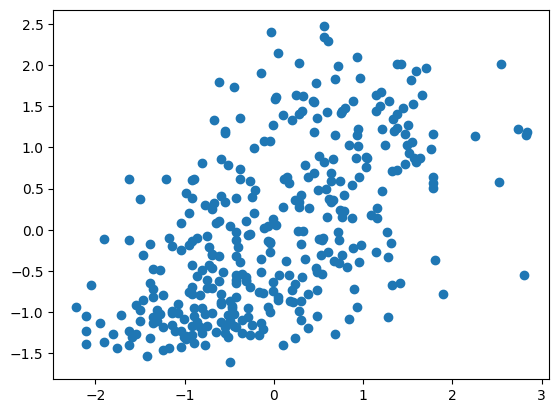

Min:  -2.2189285353791526 Max:  2.8333099089582676 Mean:  0.0 Std:  0.9999999999999996


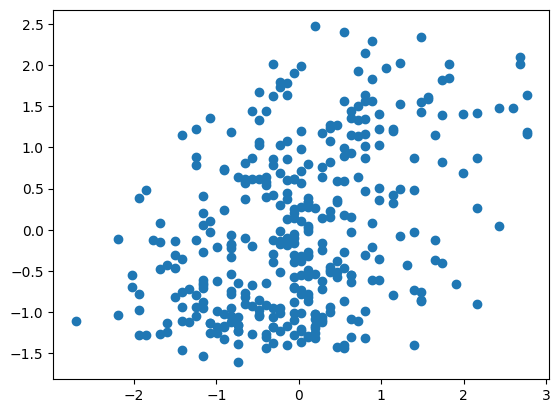

Min:  -2.706161676459996 Max:  2.76672388388234 Mean:  -8.051475759321249e-17 Std:  1.0000000000000004


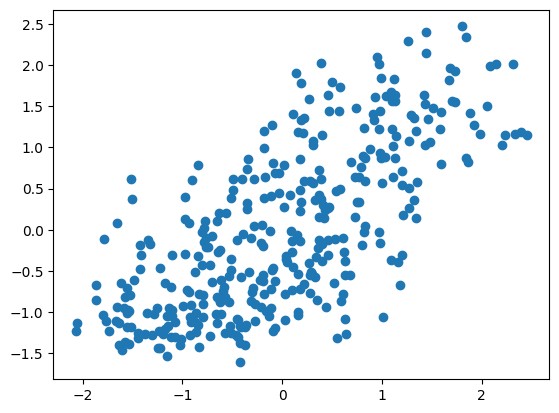

Min:  -2.0675264084585825 Max:  2.4536623381415255 Mean:  -1.7059064265061895e-15 Std:  1.0000000000000002


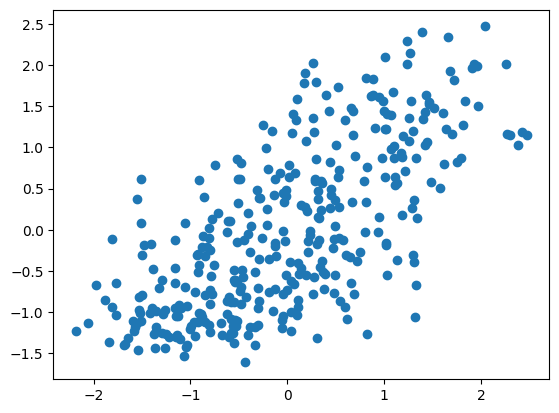

Min:  -2.1825065007311792 Max:  2.4710640228717744 Mean:  1.924805923712736e-16 Std:  1.0000000000000002


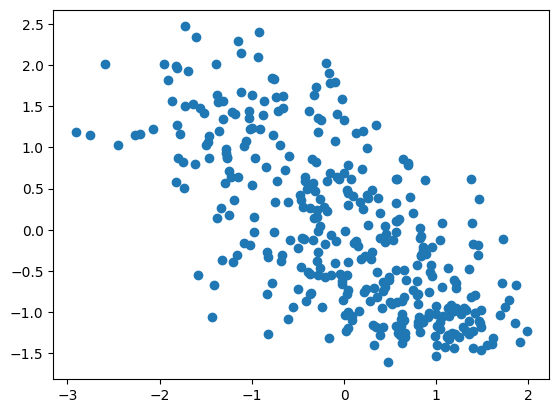

Min:  -2.90795610431848 Max:  1.981972919499748 Mean:  -1.2542689581317632e-15 Std:  1.0


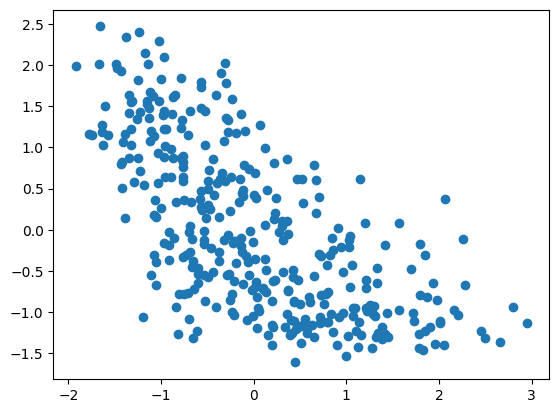

Min:  -1.9196270644158195 Max:  2.9476262741240964 Mean:  -5.72409604764245e-16 Std:  0.9999999999999997


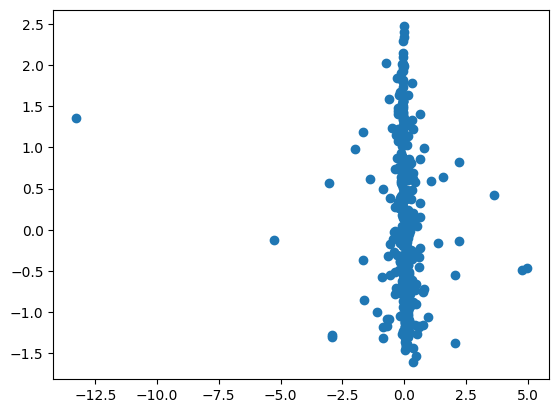

Min:  -13.283716812720009 Max:  4.9693349501091655 Mean:  1.0064344699151561e-17 Std:  1.0000000000000004


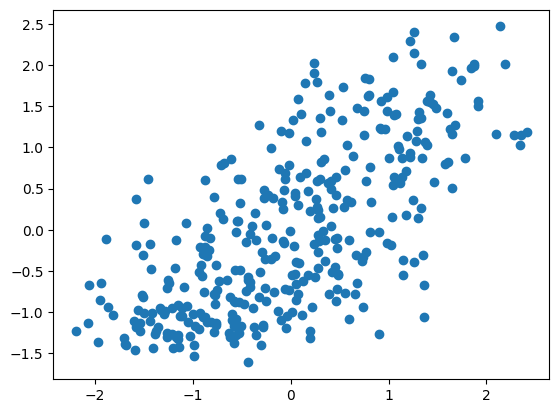

Min:  -2.1958859435249214 Max:  2.4130394796863186 Mean:  1.8229044336338263e-15 Std:  0.9999999999999998


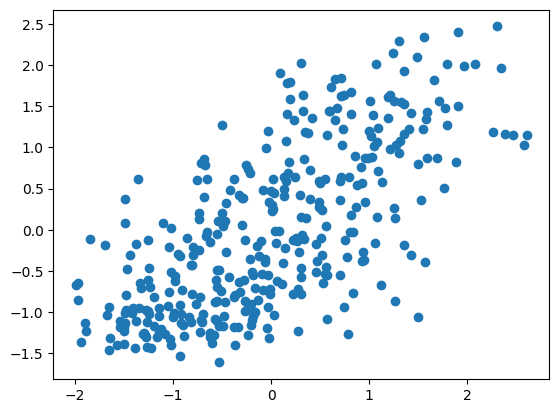

Min:  -1.9869431543028706 Max:  2.603835086511294 Mean:  -2.0128689398303122e-17 Std:  0.9999999999999997


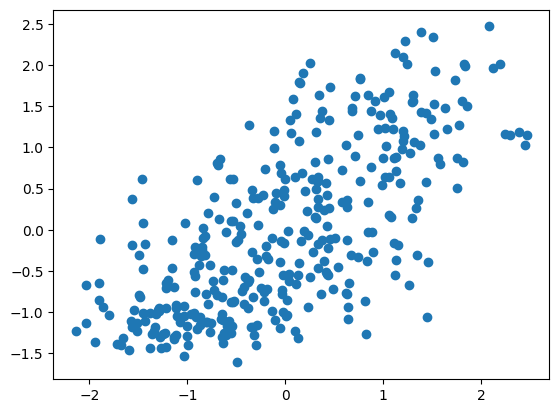

Min:  -2.13684358507033 Max:  2.464951420850943 Mean:  -5.610872169776996e-16 Std:  0.9999999999999998


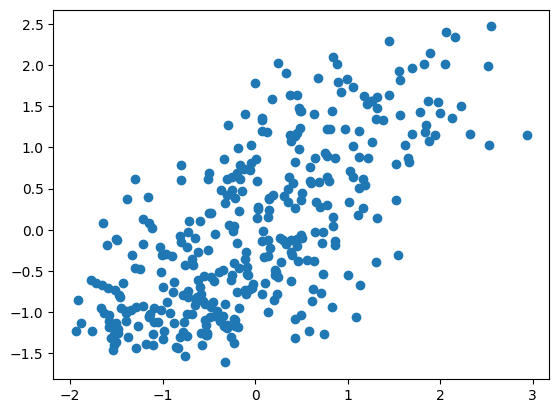

Min:  -1.938250538579601 Max:  2.9359118084646325 Mean:  -2.4909253130400114e-16 Std:  1.0000000000000004


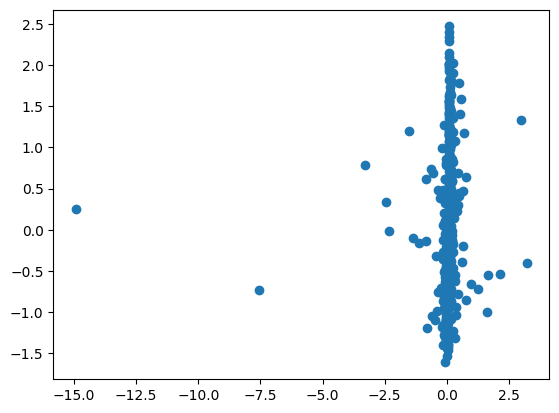

Min:  -14.926783336847631 Max:  3.223546962678133 Mean:  5.0321723495757804e-17 Std:  0.9999999999999997


In [32]:
for i in range(tester.new_X_train.shape[1]):
    plt.clf()
    plt.scatter(tester.new_X_train[:, i], tester.y_train)
    plt.show()
    print("Min: ", tester.new_X_train[:, i].min(), "Max: ", tester.new_X_train[:, i].max(), "Mean: ", tester.new_X_train[:, i].mean(), "Std: ", tester.new_X_train[:, i].std())
    